# Preprocessing data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df_train = pd.read_csv("data/training_set_VU_DM.csv")


## Transform datetime

In [7]:
df_train["date_time"] = pd.to_datetime(df_train["date_time"])
df_train["year"] = df_train["date_time"].dt.year
df_train["month"] = df_train["date_time"].dt.month
df_train = df_train.drop(columns="date_time")
df_train

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month
0,1,12,187,NaN,NaN,219,893,3,3.5,1,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
1,1,12,187,NaN,NaN,219,10404,4,4.0,1,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
2,1,12,187,NaN,NaN,219,21315,3,4.5,1,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
3,1,12,187,NaN,NaN,219,27348,2,4.0,1,...,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,2013,4
4,1,12,187,NaN,NaN,219,29604,4,3.5,1,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,5,219,NaN,NaN,219,77700,3,4.0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013,6
4958343,332785,5,219,NaN,NaN,219,88083,3,4.0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013,6
4958344,332785,5,219,NaN,NaN,219,94508,3,3.5,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2013,6
4958345,332785,5,219,NaN,NaN,219,128360,3,5.0,1,...,NaN,NaN,NaN,NaN,NaN,1,157.84,1,2013,6


## Remove outliers / exlcuding nan-columns

In [4]:
cols_missing = df_train.columns[df_train.isnull().any()].tolist()

for col in df_train.columns:
    if col not in cols_missing:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_values = Q3 + 1.5 * IQR
        lower_values = Q1 - 1.5 * IQR
        # tried to follow this example, but it didn't work out: https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
        # df_train = df_train[~((df_train[col] < (Q1 - 1.5 * IQR)) |(df_train[col] > (Q3 + 1.5 * IQR))).any(axis=1)]
        to_be_removed = list(df_train.loc[((df_train[col] < lower_values) | (df_train[col] > upper_values))].index)
        
#for index in indices_to_remove:
rows_to_be_removed = list(set(to_be_removed))
df_train = df_train.drop(index=rows_to_be_removed, errors="ignore", axis=0)
# display(df_train)

        

## Outlier detection / nan-columns

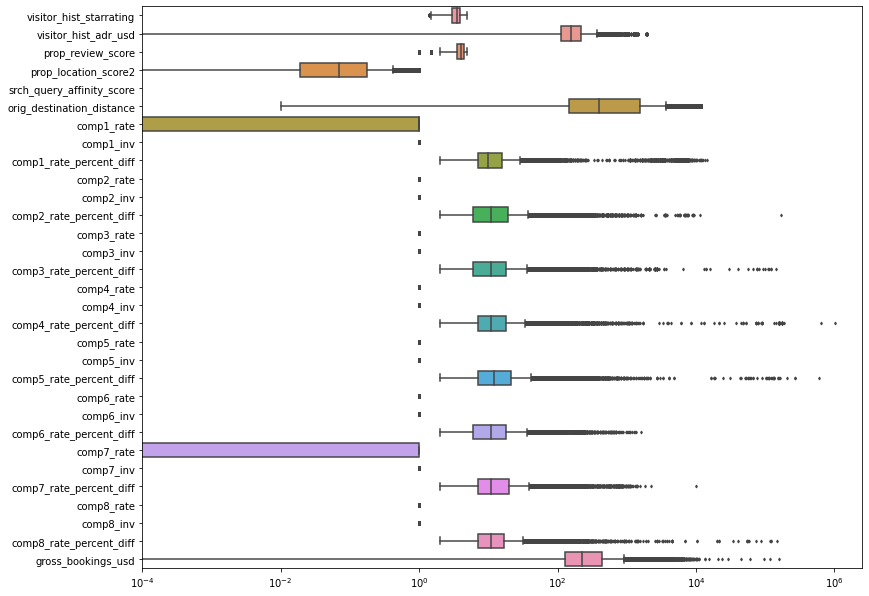

In [5]:
def outliers():
    # cols = [
    #         'prop_location_score2',
    #         'prop_location_score1',
    #         'srch_booking_window',
    #         'price_usd',
    #         'prop_historical_price',
    #         'orig_destination_distance',
    #         ]
    cols = df_train.columns[df_train.isnull().any()].tolist()
    fig, axarr = plt.subplots(figsize=(2000/120, 1200/120))
   # ax = df[cols].boxplot(rot=90, return_type="axes", sym='k.', showfliers=True)
    """
    train[cols].boxplot(vert=False, sym='k.')
    plt.xscale('log')
    """
    #vals = [x.dropna() for y,x in df[cols].iteritems()]
    ax = sns.boxplot(data=df_train[cols], orient='h', fliersize=2)
    ax.set_xscale('log')
    plt.xlim(xmin=1e-4)
    plt.subplots_adjust(left=0.3, bottom=0.1)
    # plt.savefig("outliers", dpi=400)

outliers()

## Fill missing values

In [6]:
df_train.isnull().sum()


srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        3781049
visitor_hist_adr_usd           3780325
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7353
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2            886972
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      3716919
orig_destination_distance

<AxesSubplot:>

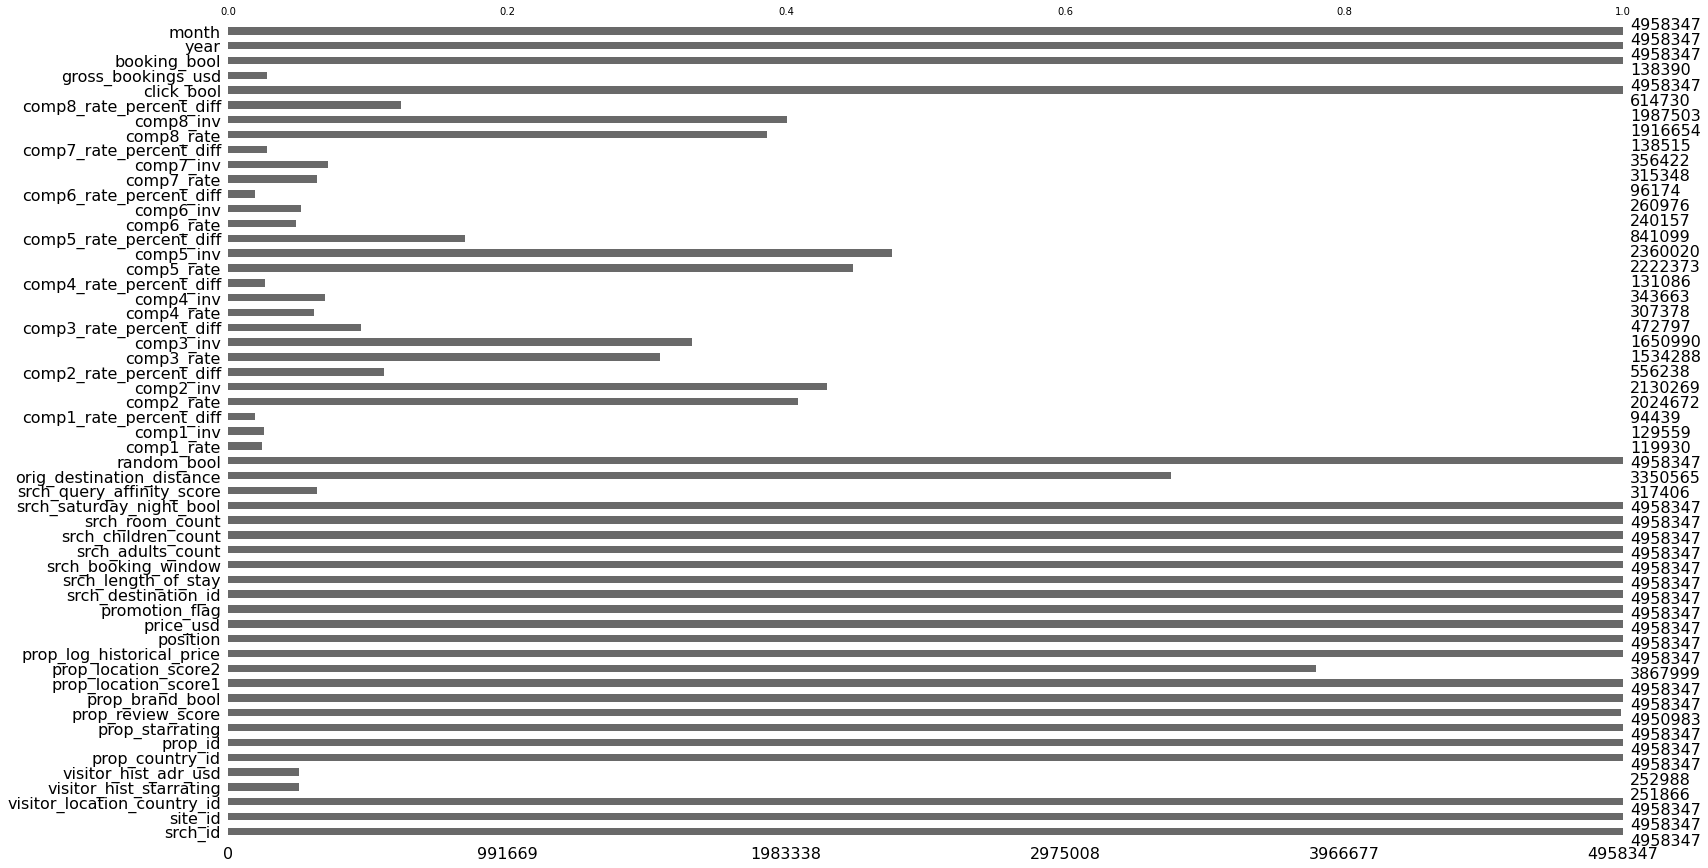

In [9]:
import missingno as msno
msno.bar(df_train)

## Missing variables

All these missing value estimations come from Jung Wang's solutions:

### Hotel descriptions

People do not like booking hotels with missing information, this should be reflected in our trainingdata. In the missing value plot you can see that:

["prop_review_score", "prop_location_score2", "srch_query_affinity_score"] 

are missing values. These three variables can be catagorized as variables describing the hotel. We will set the missing variables of these values to 0. 

### orig_destination_distance

Other papers have indicated the importance of this feature https://arxiv.org/pdf/1908.07498.pdf. We therefore try and find a solution for it. In the paper they use a technique called: Distance Matrix Completion. The idea behind this is that we often know the current location of the user and the location of the hotel. However we don't have access to the actual meaning of the location id's of the data (as far as I know). In this technique we use the limited amount of data we have at orig_destination_distance to interpolate / calculate the distances of the instances we don't have.

## Other variables

Owen Zhang just sets all the missing values to -1...

In [ ]:
# ["prop_review_score", "prop_location_score2", "srch_query_affinity_score"]
df_train["prop_review_score"] = df_train["prop_review_score"].fillna(value=0)
df_train["prop_location_score2"] = df_train["prop_location_score2"].fillna(value=0)
df_train["srch_query_affinity_score"] = df_train["srch_query_affinity_score"].fillna(value=0)

KeyboardInterrupt: 

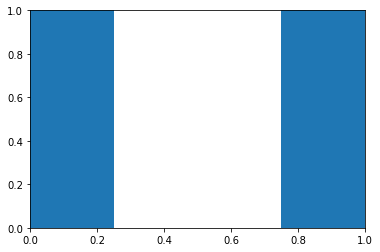

In [21]:
# Calculate distance between visitor and hotel
df_train.visitor_location_country_id.plot(kind="bar")

In [ ]:
df_train = df_train.fillna(value=-1)

## Balance dataset between clicked and not-clicked items

In [9]:
#balancing dataset
click_indices = df_train[df_train.click_bool == 1].index
random_indices = np.random.choice(click_indices, len(df_train.loc[df_train.click_bool == 1]), replace=False)
click_sample = df_train.loc[random_indices]

not_click = df_train[df_train.click_bool == 0].index
random_indices = np.random.choice(not_click, sum(df_train['click_bool']), replace=False)
not_click_sample = df_train.loc[random_indices]

df_train = pd.concat([not_click_sample, click_sample], axis=0)

print("Percentage of not click impressions: ", len(df_train[df_train.click_bool == 0])/len(df_train))
print("Percentage of click impression: ", len(df_train[df_train.click_bool == 1])/len(df_train))
print("Total number of records in resampled data: ", len(df_train))

Percentage of not click impressions:  0.5
Percentage of click impression:  0.5
Total number of records in resampled data:  356904


## Balance dataset between booked and not-booked items

In [11]:
#balancing dataset
book_indices = df_train[df_train.booking_bool == 1].index
random_indices = np.random.choice(book_indices, len(df_train.loc[df_train.booking_bool == 1]), replace=False)
book_sample = df_train.loc[random_indices]

not_booked = df_train[df_train.booking_bool == 0].index
random_indices = np.random.choice(not_booked, sum(df_train['booking_bool']), replace=False)
not_booked_sample = df_train.loc[random_indices]

df_train = pd.concat([not_booked_sample, book_sample], axis=0)

print("Percentage of not booked impressions: ", len(df_train[df_train.booking_bool == 0])/len(df_train))
print("Percentage of booked impression: ", len(df_train[df_train.booking_bool == 1])/len(df_train))
print("Total number of records in resampled data: ", len(df_train))

Percentage of not booked impressions:  0.5
Percentage of booked impression:  0.5
Total number of records in resampled data:  222096
